# <font color='red' size='6'>Tópicos Especiais em Computação II</font>
# Atividade II: Integração, Compreensão e Análise Exploratória dos Dados
## Nome do Grupo: <font color='black'>Richard Matheus P dos Santos</font>

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings 
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

/home/richard/anaconda3/lib/python3.7/site-packages/scipy/__init__.py:140: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [2]:
# Leitura do 1o arquivo CSV com separador ";" e codificação UTF-8
dfImoveis_SCS_1 = pd.read_csv('bdImoveis2021_richardmatheus.csv', encoding = 'UTF-8')

In [3]:
# Mostra dois registros do arquivo
dfImoveis_SCS_1.head(2)

,tipo,tempo,localizacao,area_total,area_util,quartos,suite,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,iptu,condominio,preco
0,1,NaN,"Rua Sílvia, 879 - Olímpico, São Caetano do Sul...",70,NaN,2,1,2,2,0,1,1,0,1,600,515,395000
1,2,NaN,"Rua Espírito Santo, 598 - Santo Antônio, São C...",117,NaN,3,1,3,1,0,0,1,0,0,1200,780,470000


In [4]:
# Mostra o total de tipos de imóveis
dfImoveis_SCS_1.groupby('tipo').size()

tipo
1    46
2    10
dtype: int64

In [5]:
# extrai a localização (endereço completo)
serieLocalizacao = dfImoveis_SCS_1['localizacao']; serieLocalizacao

0     Rua Sílvia, 879 - Olímpico, São Caetano do Sul...
1     Rua Espírito Santo, 598 - Santo Antônio, São C...
2     Rua Marina Jacomini, 60 - Santa Paula, São Cae...
3     Rua Nazaret, 1445 - Barcelona, São Caetano do ...
4     Alameda São Caetano, 1345 - Santa Maria, São C...
5     Rua Conselheiro Lafayette, 450 - Santa Paula, ...
6     Alameda João Galego, 961 - Santa Maria, São Ca...
7     Rua São Jorge, 630, Santo Antônio, São Caetano...
8     Rua Padre Mororó, 85 - São José, São Caetano d...
9     Rua Espírito Santo - Ceramica, São Caetano do ...
10    Rua Aparecida, 200 - Boa Vista, São Caetano do...
11    Rua Carmem Miranda - Boa Vista, São Caetano do...
12    Rua Giovani Perucchi - Osvaldo Cruz, São Caeta...
13    Rua Bertolino da Cunha - Osvaldo Cruz, São Cae...
14    Rua Rio Grande do Sul - Centro, São Caetano do...
15    Rua Henrica Grigoletto Rizzo, 1 - Olímpico, Sã...
16    Alameda Conde de Porto Alegre - Santa Maria, S...
17     Rua Teffé - Santa Maria, São Caetano do S

In [6]:
# import expressões regulares
import re

In [7]:
# para cada linha da série, faz listas de valores separados por - e ,
listas = [re.split('-|,', serieLocalizacao[serie]) for serie in range(serieLocalizacao.count())]

In [8]:
# converte as listas para dataFrame e apresenta os valores
pdf = pd.DataFrame(listas); pdf

,0,1,2,3,4
0,Rua Sílvia,879,Olímpico,São Caetano do Sul,SP
1,Rua Espírito Santo,598,Santo Antônio,São Caetano do Sul,SP
2,Rua Marina Jacomini,60,Santa Paula,São Caetano do Sul,SP
3,Rua Nazaret,1445,Barcelona,São Caetano do Sul,SP
4,Alameda São Caetano,1345,Santa Maria,São Caetano do Sul,SP
5,Rua Conselheiro Lafayette,450,Santa Paula,São Caetano do Sul,SP
6,Alameda João Galego,961,Santa Maria,São Caetano do Sul,SP
7,Rua São Jorge,630,Santo Antônio,São Caetano do Sul,None
8,Rua Padre Mororó,85,São José,São Caetano do Sul,SP
9,Rua Espírito Santo,Ceramica,São Caetano do Sul,SP,None


In [9]:
# Altera os nomes das colunas e apresenta os 4 primeiros registros
pdf.columns = ['rua','bairro', 'cidade', 'estado', 'vazia']; pdf.head(20)

,rua,bairro,cidade,estado,vazia
0,Rua Sílvia,879,Olímpico,São Caetano do Sul,SP
1,Rua Espírito Santo,598,Santo Antônio,São Caetano do Sul,SP
2,Rua Marina Jacomini,60,Santa Paula,São Caetano do Sul,SP
3,Rua Nazaret,1445,Barcelona,São Caetano do Sul,SP
4,Alameda São Caetano,1345,Santa Maria,São Caetano do Sul,SP
5,Rua Conselheiro Lafayette,450,Santa Paula,São Caetano do Sul,SP
6,Alameda João Galego,961,Santa Maria,São Caetano do Sul,SP
7,Rua São Jorge,630,Santo Antônio,São Caetano do Sul,None
8,Rua Padre Mororó,85,São José,São Caetano do Sul,SP
9,Rua Espírito Santo,Ceramica,São Caetano do Sul,SP,None


In [10]:
# Observe que alguns bairros ficaram com o Número (devido a vírgula após o split())  
# e algumas ruas contém o nome do bairro, pois não tem o nome da rua no registro 
pdf.groupby('bairro').size()

bairro
 0                      1
 1                      1
 1345                   1
 1445                   1
 150                    1
 200                    1
 209                    1
 240                    1
 410                    1
 450                    1
 598                    1
 60                     1
 630                    1
 85                     1
 879                    1
 935                    1
 961                    1
 Barcelona              3
 Boa Vista              4
 Centro                 4
 Ceramica               1
 Jardim São Caetano     5
 Maua                   3
 Nova Gerti             3
 Olímpico               3
 Osvaldo Cruz           3
 Santa Maria            4
 Santa Paula            2
 São Caetano do Sul     3
 São José               1
dtype: int64

In [11]:
# Faz uso de list comprehension para extrair o nome dos bairros que estão na coluna cidade e cria uma lista de bairros
# Em outras palavras, remove os números contidos nos bairros
bairros = [pdf.cidade[i].strip() if pdf.bairro[i].strip().isdigit() else pdf.bairro[i].strip() for i in range(pdf.bairro.count())]

In [12]:
# Atribui os bairros ao dataFrame completo
# Apresenta o dataframe agrupado por  bairros após a remoção dos números. 
# Observe que falta somente remover o nome da cidade (São Caetano do Sul)
pdf.bairro = bairros;   pdf.groupby('bairro').size()

bairro
Barcelona             4
Boa Vista             5
Centro                4
Ceramica              1
Jardim São Caetano    7
Maua                  3
Nova Gerti            3
Olímpico              7
Osvaldo Cruz          3
Prosperidade          1
Santa Maria           6
Santa Paula           5
Santo Antônio         2
São Caetano do Sul    3
São José              2
dtype: int64

In [13]:
# Faz uso de list comprehension para extrair o nome do bairro do na coluna rua e cria uma lista de bairros
# Em outras palavras, remove o nome "São Caetano do Sul" contido nos bairros
bairros = [pdf.rua[i].strip() if pdf.bairro[i].strip() == 'São Caetano do Sul' else pdf.bairro[i].strip() for i in range(pdf.bairro.count())]

In [14]:
# Atribui os bairros ao dataFrame completo; faz um groupy por bairro para ver o resultado
pdf.bairro = bairros; pdf.groupby('bairro').size()

bairro
Barcelona             4
Boa Vista             5
Centro                4
Ceramica              1
Jardim São Caetano    8
Maua                  3
Nova Gerti            3
Olímpico              7
Osvaldo Cruz          3
Prosperidade          1
Santa Maria           6
Santa Paula           7
Santo Antônio         2
São José              2
dtype: int64

In [15]:
# Renomeia o nome da coluna localização para bairro
dfImoveis_SCS_1.rename(columns={'localizacao':'bairro'}, inplace = True); 

In [16]:
# Altera o dataFrame e apresenta o resultado
dfImoveis_SCS_1['bairro'] = pdf.bairro; dfImoveis_SCS_1.head(3) 

,tipo,tempo,bairro,area_total,area_util,quartos,suite,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,iptu,condominio,preco
0,1,NaN,Olímpico,70,NaN,2,1,2,2,0,1,1,0,1,600,515,395000
1,2,NaN,Santo Antônio,117,NaN,3,1,3,1,0,0,1,0,0,1200,780,470000
2,2,NaN,Santa Paula,110,NaN,3,1,3,1,0,0,1,0,0,1400,917,600000


In [17]:
# Remover algunas colunas do dataFrame e apresenta o dataframe
dfImoveis_SCS_1.drop(['tempo', 'area_util', 'iptu'], axis = 1, inplace=True); dfImoveis_SCS_1.head(3) 

,tipo,bairro,area_total,quartos,suite,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,1,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,1,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,1,3,1,0,0,1,0,0,917,600000


In [18]:
dfImoveis_SCS_1.shape

(56, 14)

In [19]:
# Leitura do 2o arquivo CSV com separador ";" e codificação UTF-8
dfImoveis_SCS_2 = pd.read_csv('bdImoveis2021_richardmatheus_2.csv', sep = ',', encoding = 'UTF-8')

In [20]:
# Mostra os 4 primeiros registros
dfImoveis_SCS_2.head(4)

,banheiros,condominio,descricao,endereco,iptu,preco,quartos,vagas,titulo
0,1,430,Piscina SalaoFestas Playground Varanda Academ...,Rua Ã‚ngela- 30 - Nova Gerty- São Caetano do S...,NaN,500,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²"
1,2,105,Piscina Churrasqueira SalaoFestas Academia Ja...,Alameda Porcelana- 185 - Cerâmica- São Caetano...,NaN,459,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²"
2,1,500,Elevador SalaoFestas AceitaAnimais,Alameda Porcelana- 55 - Cerâmica- São Caetano ...,NaN,720,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²"
3,3,520,Elevador Piscina Churrasqueira SalaoFestas Pl...,Rua Tibagi- 571 - Santa Maria- São Caetano do ...,NaN,390,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²"


In [21]:
dfImoveis_SCS_2.shape

(4068, 9)

In [22]:
# Obtém os dados do campo encereço, faz um split() de cada campo por - (traço) e , (vírgula) criando uma lista de palavras
# monta um DataFrame a partir da lista gerada e apresenta o seu conteúdo
serieEndereco = dfImoveis_SCS_2['endereco']
import re
listaEnderecos = [re.split('-|,', serieEndereco[serie]) for serie in range(serieEndereco.count())]
pdf_end = pd.DataFrame(listaEnderecos); pdf_end

,0,1,2,3,4
0,Rua Ã‚ngela,30,Nova Gerty,São Caetano do Sul,SP
1,Alameda Porcelana,185,Cerâmica,São Caetano do Sul,SP
2,Alameda Porcelana,55,Cerâmica,São Caetano do Sul,SP
3,Rua Tibagi,571,Santa Maria,São Caetano do Sul,SP
4,Rua São Paulo,901,Cerâmica,São Caetano do Sul,SP
5,Jardim Sao Caetano,São Caetano do Sul,SP,None,None
6,Rua LuÃ­s Louza,210,Olímpico,São Caetano do Sul,SP
7,Rua São Jorge,604,Santo Antônio,São Caetano do Sul,SP
8,Rua HeloÃ­sa Pamplona,720,Fundação,São Caetano do Sul,SP
9,Alameda Porcelana,55,Cerâmica,São Caetano do Sul,SP


In [23]:
# Altera o nome das colunas para rua bairro cidade estado e vazia, apresentando o resultado das 4 primeiras
pdf_end.columns = ['rua','bairro', 'cidade', 'estado', 'vazia']; pdf_end.head(4)

,rua,bairro,cidade,estado,vazia
0,Rua Ã‚ngela,30,Nova Gerty,São Caetano do Sul,SP
1,Alameda Porcelana,185,Cerâmica,São Caetano do Sul,SP
2,Alameda Porcelana,55,Cerâmica,São Caetano do Sul,SP
3,Rua Tibagi,571,Santa Maria,São Caetano do Sul,SP


In [24]:
# Faz uso de list comprehension para extrair o nome dos bairros que estão na coluna cidade e cria uma lista de bairros
# Em outras palavras, remove os números contidos nos bairros
bairros1 = [pdf_end.cidade[i].strip() if pdf_end.bairro[i].strip().isdigit() else pdf_end.bairro[i].strip() for i in range(pdf_end.bairro.count())]
pdf_end.bairro = bairros1

In [25]:
pdf_end

,rua,bairro,cidade,estado,vazia
0,Rua Ã‚ngela,Nova Gerty,Nova Gerty,São Caetano do Sul,SP
1,Alameda Porcelana,Cerâmica,Cerâmica,São Caetano do Sul,SP
2,Alameda Porcelana,Cerâmica,Cerâmica,São Caetano do Sul,SP
3,Rua Tibagi,Santa Maria,Santa Maria,São Caetano do Sul,SP
4,Rua São Paulo,Cerâmica,Cerâmica,São Caetano do Sul,SP
5,Jardim Sao Caetano,São Caetano do Sul,SP,None,None
6,Rua LuÃ­s Louza,Olímpico,Olímpico,São Caetano do Sul,SP
7,Rua São Jorge,Santo Antônio,Santo Antônio,São Caetano do Sul,SP
8,Rua HeloÃ­sa Pamplona,Fundação,Fundação,São Caetano do Sul,SP
9,Alameda Porcelana,Cerâmica,Cerâmica,São Caetano do Sul,SP


In [26]:
# Faz uso de list comprehension para extrair o nome do bairro do na coluna rua e cria uma lista de bairros
# Em outras palavras, remove o nome "São Caetano do Sul" contido nos bairros
bairros1 = [pdf_end.rua[i].strip() if pdf_end.bairro[i].strip() == 'São Caetano do Sul' else pdf_end.bairro[i].strip() for i in range(pdf_end.bairro.count())]
pdf_end.bairro = bairros1; pdf_end.groupby('bairro').size()

bairro
Barcelona             541
Boa Vista             264
Centro                100
Cerâmica              539
Fundação              139
Jardim Sao Caetano     87
Mauá                  113
Nova Gerty            151
Olímpico              426
Osvaldo Cruz           87
Santa Maria           579
Santa Paula           790
Santo Antônio         252
dtype: int64

In [27]:
# Renomeia o nome da coluna endereco para bairro e altera o seu conteúdo para conter somente o bairro
dfImoveis_SCS_2.rename(columns={'endereco':'bairro'}, inplace = True); dfImoveis_SCS_2['bairro'] = pdf_end.bairro

In [28]:
# Apresenta os 4 primeiros registros
dfImoveis_SCS_2.head(4)

,banheiros,condominio,descricao,bairro,iptu,preco,quartos,vagas,titulo
0,1,430,Piscina SalaoFestas Playground Varanda Academ...,Nova Gerty,NaN,500,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²"
1,2,105,Piscina Churrasqueira SalaoFestas Academia Ja...,Cerâmica,NaN,459,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²"
2,1,500,Elevador SalaoFestas AceitaAnimais,Cerâmica,NaN,720,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²"
3,3,520,Elevador Piscina Churrasqueira SalaoFestas Pl...,Santa Maria,NaN,390,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²"


In [29]:
# coloca o preco dos imóveis contendo o "000" para aqueles valores menores do que 10000, reatribui ao DataFrame 
# e apresenta os 4 primeiros
preco = dfImoveis_SCS_2['preco']
preco = [preco[i]+'000' if preco[i] != "Sob Consulta" and len(preco[i]) < 5 else preco[i] for i in range(preco.count())]
dfImoveis_SCS_2['preco'] = preco; dfImoveis_SCS_2.head(4)

,banheiros,condominio,descricao,bairro,iptu,preco,quartos,vagas,titulo
0,1,430,Piscina SalaoFestas Playground Varanda Academ...,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²"
1,2,105,Piscina Churrasqueira SalaoFestas Academia Ja...,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²"
2,1,500,Elevador SalaoFestas AceitaAnimais,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²"
3,3,520,Elevador Piscina Churrasqueira SalaoFestas Pl...,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²"


In [30]:
# Obtém a descrição do DataFrame, faz um split() por espaço em branco e monta uma lista
serieDescricao = dfImoveis_SCS_2['descricao']
import re
listaDesc = [re.split(' ', serieDescricao[serie]) for serie in range(serieDescricao.count())]
pdf_Des = pd.DataFrame(listaDesc); pdf_Des.head(4)

,0,1,2,3,4,5,6,7
0,,Piscina,SalaoFestas,Playground,Varanda,Academia,,
1,,Piscina,Churrasqueira,SalaoFestas,Academia,Jardim,,
2,,Elevador,SalaoFestas,AceitaAnimais,,,None,None
3,,Elevador,Piscina,Churrasqueira,SalaoFestas,Playground,,


In [31]:
# Função que obtem todas as descrições, monta em uma lista e retorna o resultado
def montaDescricao(pdf):
    li = list()
    for i in range(len(pdf.columns)):
        for j in range(pdf.count()[i]):
            if pdf.loc[j,i] != '' and pdf.loc[j,i] != None:
                if pdf.loc[j,i] not in li:
                    li.append(pdf.loc[j,i])       
    return li

In [32]:
'''
Tinha sido solicitado:
Número de quartos:
Suíte: Sim (1) ou Não (0)
Número de Banheiros:
Número de Vagas para Carros:
Academia: Sim (1) ou Não (0)
Churrasqueira: Sim (1) ou Não (0)
Elevador: Sim (1) ou Não (0)
Salão de Festas: Sim (1) ou Não (0)
Piscina: Sim (1) ou Não (0)

Porém, observe que o campo quartos, banheiros e vagas estão no dataframe original
'''
listaDescricao = montaDescricao(pdf_Des); listaDescricao

['Piscina',
 'Elevador',
 'Mobiliado',
 'Jardim',
 'SalaoFestas',
 'Churrasqueira',
 'ArCondicionado',
 'AceitaAnimais',
 'Playground',
 'Academia',
 'AreaServico',
 'Varanda',
 'CondominioFechado',
 'CozinhaAmericana',
 'EspacoGourmet']

In [33]:
# Por este fato, ou seja, como os campos quartos, banheiros e vagas estão no dataframe original
# serão criadas somente colunas para o dataFrame contendo elevador, piscina, salaoFestas, Churrasqueria, Academia
listaDescricaoAtual = ['Elevador', 'Piscina', 'SalaoFestas', 'Churrasqueira', 'Academia']

In [34]:
# Monta dicionário contendo as chaves da lista (elevador, piscina, salaoFestas, Churrasqueria, Academia)
# a partir do conjunto de dados do dataframe pdf
def montDicionario(pdf, lista):
    dicio = dict()
    tamCols = len(pdf.columns)
    tamLista = len(lista)
    k = 0
    # percorre a lista de descrições
    while k < tamLista:
        listaValores = list()
        i = 0
        # percorre as colunas do dataFrame
        while i < tamCols:
            pertence = False
            tamLins = pdf.count()[i]
            j = 0
            # percorre as linhas do dataFrame
            while j < tamLins and not pertence:
                if pdf.loc[j,i] == lista[k]:
                    pertence = True
                j += 1
            if pertence == True:
                listaValores.append(1)
            else:
                listaValores.append(0)
            i += 1
        dicio[lista[k]] = listaValores
        k += 1
    return dicio

In [35]:
# Faz uma transposta do dataFrame e apresenta o resultado
pdf_DesT = pdf_Des.T; pdf_DesT

,0,1,2,3,4,5,6,7,8,9,...,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067
0,,,,,,,,,,,...,,,,,,,,,,
1,Piscina,Piscina,Elevador,Elevador,Mobiliado,Mobiliado,Elevador,Mobiliado,Mobiliado,Elevador,...,Elevador,Mobiliado,Mobiliado,Mobiliado,Piscina,Piscina,Mobiliado,Jardim,Mobiliado,Elevador
2,SalaoFestas,Churrasqueira,SalaoFestas,Piscina,Elevador,Elevador,Churrasqueira,Elevador,Elevador,Piscina,...,Piscina,Elevador,Elevador,,SalaoFestas,Churrasqueira,Elevador,AceitaAnimais,Elevador,Piscina
3,Playground,SalaoFestas,AceitaAnimais,Churrasqueira,SalaoFestas,Piscina,SalaoFestas,Churrasqueira,Piscina,Churrasqueira,...,Churrasqueira,Churrasqueira,Piscina,None,Playground,SalaoFestas,AceitaAnimais,,Piscina,AreaServico
4,Varanda,Academia,,SalaoFestas,Playground,Churrasqueira,Playground,SalaoFestas,AreaServico,SalaoFestas,...,SalaoFestas,SalaoFestas,Churrasqueira,None,Varanda,Academia,CozinhaAmericana,None,Churrasqueira,Churrasqueira
5,Academia,Jardim,,Playground,Varanda,SalaoFestas,Academia,Academia,Churrasqueira,Playground,...,Playground,Academia,SalaoFestas,None,Academia,Jardim,,None,SalaoFestas,SalaoFestas
6,,,None,,,,,,,,...,,,,None,,,,None,,
7,,,None,,,,,,,,...,,,,None,,,None,None,,


In [36]:
# Monta o dicionários contendo os valores para todos os registros da lista 
# contendo elevador, piscina, salaoFestas, Churrasqueria, Academia como chaves
# dicio = montDicionario(pdf_DesT, listaDescricaoAtual)

# Gera um dataFrame a partir do resultado obtido com o dicionário
# dfdescri = pd.DataFrame(dicio); dfdescri


# coloca  resultado para arquivo csv 
# Leitura da descrição
dfdescri = pd.read_csv('descricao.csv');  dfdescri.drop(columns=['Unnamed: 0'], inplace=True); dfdescri

,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia
0,1,0,1,0,1
1,1,1,1,1,0
2,0,1,1,0,1
3,1,1,1,1,0
4,1,0,1,1,1
5,1,1,1,1,0
6,0,0,0,0,0
7,0,1,1,0,1
8,0,1,1,1,1
9,1,0,1,0,0


In [37]:
# coloca  resultado para arquivo csv 
dfdescri.to_csv("descricao.csv")

In [38]:
# apresenta o conteudo do 1o arquivo de imóveis
dfImoveis_SCS_1.head(4)

,tipo,bairro,area_total,quartos,suite,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,1,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,1,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,1,3,1,0,0,1,0,0,917,600000
3,2,Barcelona,155,3,1,2,2,1,1,1,1,0,650,620000


In [39]:
# apresenta o conteudo do 2o arquivo de imóveis
dfImoveis_SCS_2.head(4)

,banheiros,condominio,descricao,bairro,iptu,preco,quartos,vagas,titulo
0,1,430,Piscina SalaoFestas Playground Varanda Academ...,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²"
1,2,105,Piscina Churrasqueira SalaoFestas Academia Ja...,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²"
2,1,500,Elevador SalaoFestas AceitaAnimais,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²"
3,3,520,Elevador Piscina Churrasqueira SalaoFestas Pl...,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²"


In [40]:
# remove a coluna Descricao
dfImoveis_SCS_2.drop(['descricao'], axis='columns', inplace=True)

In [41]:
# apresenta o conteudo do 2o arquivo de imóveis
dfImoveis_SCS_2.head(4)

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,titulo
0,1,430,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²"
1,2,105,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²"
2,1,500,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²"
3,3,520,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²"


In [42]:
# concatenando as outras colunas relativo a descrição ao data frame 2
dfImoveis_SCS_2 = pd.concat([dfImoveis_SCS_2, dfdescri], axis=1); dfImoveis_SCS_2.head(4)

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,titulo,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia
0,1,430,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²",1,0,1,0,1
1,2,105,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²",1,1,1,1,0
2,1,500,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²",0,1,1,0,1
3,3,520,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²",1,1,1,1,0


In [43]:
# obtém o coluna de título 
serieTitulo = dfImoveis_SCS_2.titulo; serieTitulo

0         Apartamento com 2 Quartos Ã  Venda, 140mÂ²  
1          Apartamento com 2 Quartos Ã  Venda, 56mÂ²  
2          Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
3          Apartamento com 2 Quartos Ã  Venda, 64mÂ²  
4          Apartamento com 2 Quartos Ã  Venda, 65mÂ²  
5          Apartamento com 3 Quartos Ã  Venda, 80mÂ²  
6         Apartamento com 3 Quartos Ã  Venda, 264mÂ²  
7         Apartamento com 2 Quartos Ã  Venda, 113mÂ²  
8          Apartamento com 2 Quartos Ã  Venda, 61mÂ²  
9          Apartamento com 2 Quartos Ã  Venda, 90mÂ²  
10        Apartamento com 3 Quartos Ã  Venda, 106mÂ²  
11         Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
12         Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
13         Apartamento com 2 Quartos Ã  Venda, 67mÂ²  
14         Apartamento com 3 Quartos Ã  Venda, 88mÂ²  
15         Apartamento com 2 Quartos Ã  Venda, 62mÂ²  
16         Apartamento com 3 Quartos Ã  Venda, 79mÂ²  
17         Apartamento com 2 Quartos Ã  Venda, 61mÂ²  
18        

In [44]:
# Verifica se a string tem número e obtém os índices montando uma lista
import re
def verificaString(serieTitulo):
    lista = list()
    for i in range(serieTitulo.count()):
        if not bool(re.search(r'\d', serieTitulo[i])):
            lista.append(i)
    return lista

In [45]:
# Obtém os índices dos títulos que não tem números
listaTitulosSemNumeros = verificaString(serieTitulo); listaTitulosSemNumeros

[18,
 25,
 32,
 54,
 61,
 68,
 90,
 97,
 104,
 126,
 133,
 140,
 162,
 169,
 176,
 198,
 205,
 212,
 234,
 241,
 248,
 270,
 277,
 284,
 306,
 313,
 320,
 342,
 349,
 356,
 378,
 385,
 392,
 414,
 421,
 428,
 450,
 457,
 464,
 486,
 493,
 500,
 522,
 529,
 536,
 558,
 565,
 572,
 594,
 601,
 608,
 630,
 637,
 644,
 666,
 673,
 680,
 702,
 709,
 716,
 738,
 745,
 752,
 774,
 781,
 788,
 810,
 817,
 824,
 846,
 853,
 860,
 882,
 889,
 896,
 918,
 925,
 932,
 954,
 961,
 968,
 990,
 997,
 1004,
 1026,
 1033,
 1040,
 1062,
 1069,
 1076,
 1098,
 1105,
 1112,
 1134,
 1141,
 1148,
 1170,
 1177,
 1184,
 1206,
 1213,
 1220,
 1242,
 1249,
 1256,
 1278,
 1285,
 1292,
 1314,
 1321,
 1328,
 1350,
 1357,
 1364,
 1386,
 1393,
 1400,
 1422,
 1429,
 1436,
 1458,
 1465,
 1472,
 1494,
 1501,
 1508,
 1530,
 1537,
 1544,
 1566,
 1573,
 1580,
 1602,
 1609,
 1616,
 1638,
 1645,
 1652,
 1674,
 1681,
 1688,
 1710,
 1717,
 1724,
 1746,
 1753,
 1760,
 1782,
 1789,
 1796,
 1818,
 1825,
 1832,
 1854,
 1861,
 1868,

In [46]:
# remove as linhas dos Títulos cujos índides indicados na lista não tem número
dfImoveis_SCS_2.drop(listaTitulosSemNumeros, inplace=True); dfImoveis_SCS_2

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,titulo,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia
0,1,430,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²",1,0,1,0,1
1,2,105,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²",1,1,1,1,0
2,1,500,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²",0,1,1,0,1
3,3,520,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²",1,1,1,1,0
4,2-3,19,Cerâmica,NaN,430000,2,2-3,"Apartamento com 2 Quartos Ã Venda, 65mÂ²",1,0,1,1,1
5,2,150,Jardim Sao Caetano,NaN,495000,3,2,"Apartamento com 3 Quartos Ã Venda, 80mÂ²",1,1,1,1,0
6,3,515,Olímpico,NaN,1980000,3,3,"Apartamento com 3 Quartos Ã Venda, 264mÂ²",0,0,0,0,0
7,2,508,Santo Antônio,NaN,1130000,2,2,"Apartamento com 2 Quartos Ã Venda, 113mÂ²",0,1,1,0,1
8,1,550,Fundação,NaN,331000,2,1,"Apartamento com 2 Quartos Ã Venda, 61mÂ²",0,1,1,1,1
9,2,1,Cerâmica,NaN,990000,2,2,"Apartamento com 2 Quartos Ã Venda, 90mÂ²",1,0,1,0,0


In [47]:
# reorganiza os índices
dfImoveis_SCS_2 = dfImoveis_SCS_2.reset_index(drop=True); dfImoveis_SCS_2

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,titulo,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia
0,1,430,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²",1,0,1,0,1
1,2,105,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²",1,1,1,1,0
2,1,500,Cerâmica,NaN,720000,2,1,"Apartamento com 2 Quartos Ã Venda, 68mÂ²",0,1,1,0,1
3,3,520,Santa Maria,NaN,390000,2,3,"Apartamento com 2 Quartos Ã Venda, 64mÂ²",1,1,1,1,0
4,2-3,19,Cerâmica,NaN,430000,2,2-3,"Apartamento com 2 Quartos Ã Venda, 65mÂ²",1,0,1,1,1
5,2,150,Jardim Sao Caetano,NaN,495000,3,2,"Apartamento com 3 Quartos Ã Venda, 80mÂ²",1,1,1,1,0
6,3,515,Olímpico,NaN,1980000,3,3,"Apartamento com 3 Quartos Ã Venda, 264mÂ²",0,0,0,0,0
7,2,508,Santo Antônio,NaN,1130000,2,2,"Apartamento com 2 Quartos Ã Venda, 113mÂ²",0,1,1,0,1
8,1,550,Fundação,NaN,331000,2,1,"Apartamento com 2 Quartos Ã Venda, 61mÂ²",0,1,1,1,1
9,2,1,Cerâmica,NaN,990000,2,2,"Apartamento com 2 Quartos Ã Venda, 90mÂ²",1,0,1,0,0


In [48]:
# obtém o coluna de título 
serieTitulo = dfImoveis_SCS_2.titulo; serieTitulo

0         Apartamento com 2 Quartos Ã  Venda, 140mÂ²  
1          Apartamento com 2 Quartos Ã  Venda, 56mÂ²  
2          Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
3          Apartamento com 2 Quartos Ã  Venda, 64mÂ²  
4          Apartamento com 2 Quartos Ã  Venda, 65mÂ²  
5          Apartamento com 3 Quartos Ã  Venda, 80mÂ²  
6         Apartamento com 3 Quartos Ã  Venda, 264mÂ²  
7         Apartamento com 2 Quartos Ã  Venda, 113mÂ²  
8          Apartamento com 2 Quartos Ã  Venda, 61mÂ²  
9          Apartamento com 2 Quartos Ã  Venda, 90mÂ²  
10        Apartamento com 3 Quartos Ã  Venda, 106mÂ²  
11         Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
12         Apartamento com 2 Quartos Ã  Venda, 68mÂ²  
13         Apartamento com 2 Quartos Ã  Venda, 67mÂ²  
14         Apartamento com 3 Quartos Ã  Venda, 88mÂ²  
15         Apartamento com 2 Quartos Ã  Venda, 62mÂ²  
16         Apartamento com 3 Quartos Ã  Venda, 79mÂ²  
17         Apartamento com 2 Quartos Ã  Venda, 61mÂ²  
18        

In [49]:
import re
listaTitulo = [re.split(' |,', serieTitulo[iserie]) for iserie in range(serieTitulo.count())]
pdf_Titulo = pd.DataFrame(listaTitulo); pdf_Titulo.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,Apartamento,com,2,Quartos,Ã,Venda,,140mÂ²,,
1,,,Apartamento,com,2,Quartos,Ã,Venda,,56mÂ²,,
2,,,Apartamento,com,2,Quartos,Ã,Venda,,68mÂ²,,
3,,,Apartamento,com,2,Quartos,Ã,Venda,,64mÂ²,,


In [50]:
pdf_Titulo.columns = ['a','b','c','d','e','f','g','h','i','j','k','l']; pdf_Titulo

,a,b,c,d,e,f,g,h,i,j,k,l
0,,,Apartamento,com,2,Quartos,Ã,Venda,,140mÂ²,,
1,,,Apartamento,com,2,Quartos,Ã,Venda,,56mÂ²,,
2,,,Apartamento,com,2,Quartos,Ã,Venda,,68mÂ²,,
3,,,Apartamento,com,2,Quartos,Ã,Venda,,64mÂ²,,
4,,,Apartamento,com,2,Quartos,Ã,Venda,,65mÂ²,,
5,,,Apartamento,com,3,Quartos,Ã,Venda,,80mÂ²,,
6,,,Apartamento,com,3,Quartos,Ã,Venda,,264mÂ²,,
7,,,Apartamento,com,2,Quartos,Ã,Venda,,113mÂ²,,
8,,,Apartamento,com,2,Quartos,Ã,Venda,,61mÂ²,,
9,,,Apartamento,com,2,Quartos,Ã,Venda,,90mÂ²,,


In [51]:
# mostra o conteúdo da célula
print(pdf_Titulo["j"][0])

140mÂ²


In [52]:
# Remove mÂ² da coluna 9
pdf_Titulo["j"] = [pdf_Titulo["j"][i].replace("mÂ²","") for i in range(pdf_Titulo["j"].count())]

In [53]:
pdf_Titulo.head(4)

,a,b,c,d,e,f,g,h,i,j,k,l
0,,,Apartamento,com,2,Quartos,Ã,Venda,,140,,
1,,,Apartamento,com,2,Quartos,Ã,Venda,,56,,
2,,,Apartamento,com,2,Quartos,Ã,Venda,,68,,
3,,,Apartamento,com,2,Quartos,Ã,Venda,,64,,


In [54]:
# Identifica o tipo do imóvel
pdf_Titulo.groupby("c").size()

c
Apartamento    3691
Casa             38
dtype: int64

In [55]:
# coloca tipo do imóvel tipo = '1' casa e  '2' = apartamento
pdf_Titulo["c"] = [2 if pdf_Titulo["c"][i] != "Casa" else 1 for i in range(pdf_Titulo["c"].count())]

In [56]:
pdf_Titulo.groupby("c").size()

c
1      38
2    3691
dtype: int64

In [57]:
dfImoveis_SCS_2.head(2)

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,titulo,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia
0,1,430,Nova Gerty,NaN,500000,2,1,"Apartamento com 2 Quartos Ã Venda, 140mÂ²",1,0,1,0,1
1,2,105,Cerâmica,NaN,459000,2,2,"Apartamento com 2 Quartos Ã Venda, 56mÂ²",1,1,1,1,0


In [58]:
# Cria a coluna de tipo de imóvel no grupo de imóveis 2
dfImoveis_SCS_2['tipo'] = pdf_Titulo['c']

In [59]:
# Cria coluna de area_total do grupo de imóveis 2
dfImoveis_SCS_2['area_total'] = pdf_Titulo['j']

In [60]:
# Remove o campo de Título do grupo de imóveis 2
dfImoveis_SCS_2.drop(['titulo'], axis='columns', inplace=True); dfImoveis_SCS_2

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia,tipo,area_total
0,1,430,Nova Gerty,NaN,500000,2,1,1,0,1,0,1,2,140
1,2,105,Cerâmica,NaN,459000,2,2,1,1,1,1,0,2,56
2,1,500,Cerâmica,NaN,720000,2,1,0,1,1,0,1,2,68
3,3,520,Santa Maria,NaN,390000,2,3,1,1,1,1,0,2,64
4,2-3,19,Cerâmica,NaN,430000,2,2-3,1,0,1,1,1,2,65
5,2,150,Jardim Sao Caetano,NaN,495000,3,2,1,1,1,1,0,2,80
6,3,515,Olímpico,NaN,1980000,3,3,0,0,0,0,0,2,264
7,2,508,Santo Antônio,NaN,1130000,2,2,0,1,1,0,1,2,113
8,1,550,Fundação,NaN,331000,2,1,0,1,1,1,1,2,61
9,2,1,Cerâmica,NaN,990000,2,2,1,0,1,0,0,2,90


In [61]:
# apresenta o conteudo do 1o arquivo de imóveis
dfImoveis_SCS_1.head(4)

,tipo,bairro,area_total,quartos,suite,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,1,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,1,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,1,3,1,0,0,1,0,0,917,600000
3,2,Barcelona,155,3,1,2,2,1,1,1,1,0,650,620000


In [62]:
# removendo a coluna de suite do grupo de imóveis 1
dfImoveis_SCS_1.drop(['suite'], axis='columns', inplace=True); dfImoveis_SCS_1

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917,600000
3,2,Barcelona,155,3,2,2,1,1,1,1,0,650,620000
4,2,Santa Maria,104,3,2,1,0,0,1,0,0,678,480000
5,2,Santa Paula,150,3,5,2,1,1,2,1,1,1120,1100000
6,1,Santa Maria,220,3,5,5,0,0,0,0,0,0,1100000
7,2,Santo Antônio,179,4,5,4,1,1,2,1,1,1500,1890000
8,1,São José,210,3,2,1,0,0,0,0,0,0,470000
9,1,Ceramica,356,3,6,7,0,0,0,0,0,0,1690000


In [63]:
# apresenta o conteudo do 2o arquivo de imóveis
dfImoveis_SCS_2.head(4)

,banheiros,condominio,bairro,iptu,preco,quartos,vagas,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia,tipo,area_total
0,1,430,Nova Gerty,NaN,500000,2,1,1,0,1,0,1,2,140
1,2,105,Cerâmica,NaN,459000,2,2,1,1,1,1,0,2,56
2,1,500,Cerâmica,NaN,720000,2,1,0,1,1,0,1,2,68
3,3,520,Santa Maria,NaN,390000,2,3,1,1,1,1,0,2,64


In [64]:
# removendo a coluna de iptu do grupo de imóveis 2
dfImoveis_SCS_2.drop(['iptu'], axis='columns', inplace=True); dfImoveis_SCS_2

,banheiros,condominio,bairro,preco,quartos,vagas,Elevador,Piscina,SalaoFestas,Churrasqueira,Academia,tipo,area_total
0,1,430,Nova Gerty,500000,2,1,1,0,1,0,1,2,140
1,2,105,Cerâmica,459000,2,2,1,1,1,1,0,2,56
2,1,500,Cerâmica,720000,2,1,0,1,1,0,1,2,68
3,3,520,Santa Maria,390000,2,3,1,1,1,1,0,2,64
4,2-3,19,Cerâmica,430000,2,2-3,1,0,1,1,1,2,65
5,2,150,Jardim Sao Caetano,495000,3,2,1,1,1,1,0,2,80
6,3,515,Olímpico,1980000,3,3,0,0,0,0,0,2,264
7,2,508,Santo Antônio,1130000,2,2,0,1,1,0,1,2,113
8,1,550,Fundação,331000,2,1,0,1,1,1,1,2,61
9,2,1,Cerâmica,990000,2,2,1,0,1,0,0,2,90


In [65]:
# Renomeia os nomes das colunas
dfImoveis_SCS_2.columns = ['banheiros','condominio','bairro','preco','quartos','vagas','elevador','piscina', 'salao_festa','churrasqueira', 'academia', 'tipo', 'area_total']

In [66]:
dfImoveis_SCS_1.head(3)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917,600000


In [67]:
# Apresenta o resultado dos nomes alterados
dfImoveis_SCS_2.head(3)

,banheiros,condominio,bairro,preco,quartos,vagas,elevador,piscina,salao_festa,churrasqueira,academia,tipo,area_total
0,1,430,Nova Gerty,500000,2,1,1,0,1,0,1,2,140
1,2,105,Cerâmica,459000,2,2,1,1,1,1,0,2,56
2,1,500,Cerâmica,720000,2,1,0,1,1,0,1,2,68


In [68]:
# altera a ordem das colunas no dataset
dfImoveis_SCS_2 = dfImoveis_SCS_2[['tipo','bairro','area_total','quartos','banheiros','vagas','academia','churrasqueira','elevador','salao_festa','piscina','condominio','preco']]

In [69]:
# Apresenta o resultado da alteração
dfImoveis_SCS_2.head()

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,2,Nova Gerty,140,2,1,1,1,0,1,1,0,430,500000
1,2,Cerâmica,56,2,2,2,0,1,1,1,1,105,459000
2,2,Cerâmica,68,2,1,1,1,0,0,1,1,500,720000
3,2,Santa Maria,64,2,3,3,0,1,1,1,1,520,390000
4,2,Cerâmica,65,2,2-3,2-3,1,1,1,1,0,19,430000


In [70]:
# apresenta o conteudo do 1o arquivo de imóveis
dfImoveis_SCS_1.head(4)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917,600000
3,2,Barcelona,155,3,2,2,1,1,1,1,0,650,620000


In [71]:
# Concatena as duas relações de imóveis em uma única
dfImoveis_SCS_final = pd.concat([dfImoveis_SCS_1, dfImoveis_SCS_2])

In [72]:
# reinicia os índices e apresenta o resultado
dfImoveis_SCS_final = dfImoveis_SCS_final.reset_index(drop=True); dfImoveis_SCS_final.head(20)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917,600000
3,2,Barcelona,155,3,2,2,1,1,1,1,0,650,620000
4,2,Santa Maria,104,3,2,1,0,0,1,0,0,678,480000
5,2,Santa Paula,150,3,5,2,1,1,2,1,1,1120,1100000
6,1,Santa Maria,220,3,5,5,0,0,0,0,0,0,1100000
7,2,Santo Antônio,179,4,5,4,1,1,2,1,1,1500,1890000
8,1,São José,210,3,2,1,0,0,0,0,0,0,470000
9,1,Ceramica,356,3,6,7,0,0,0,0,0,0,1690000


In [73]:
dfImoveis_SCS_final.shape

(3785, 13)

In [74]:
# Realiza a leitura de um arquivo Excel, planilha p1
xlsx = pd.ExcelFile('bdImoveis2021_richardmatheus_excel.xlsx')
dfImoveis_SCS_excel = pd.read_excel(xlsx, 'p1')

In [75]:
# Apresenta o conteúdo de 5 registros
dfImoveis_SCS_excel.head()

,tipo,endereco,tempo,area_total,area_util,quartos,banheiros,suite,vagas,academia,churrasqueira,elevador,salao_festa,piscina,iptu,condominio,preco
0,1,"Cerâmica, São Caetano do Sul",-1,800,800,4,8,4,6,0,1,0,1,1,NaN,2000.0,6900000
1,1,"Cerâmica, São Caetano do Sul",-1,800,800,4,6,4,10,0,1,0,1,1,NaN,NaN,8000000
2,1,"Cerâmica, São Caetano do Sul",-1,580,580,4,7,4,4,0,1,0,0,1,NaN,770.0,6400000
3,1,"Cerâmica, São Caetano do Sul",-1,1000,1000,5,8,5,6,0,1,0,0,1,NaN,NaN,13000000
4,1,"Cerâmica, São Caetano do Sul",-1,550,550,3,7,3,4,0,1,0,0,1,NaN,NaN,6400000


In [76]:
# Obtém os dados do campo encereço, faz um split() de cada campo por - (traço) e , (vírgula) criando uma lista de palavras
# monta um DataFrame a partir da lista gerada e apresenta o seu conteúdo
serieEndereco = dfImoveis_SCS_excel['endereco']
import re
listaEnderecos = [re.split('-|,', serieEndereco[serie]) for serie in range(serieEndereco.count())]
pdf_end = pd.DataFrame(listaEnderecos); pdf_end

,0,1,2,3,4
0,Cerâmica,São Caetano do Sul,None,None,None
1,Cerâmica,São Caetano do Sul,None,None,None
2,Cerâmica,São Caetano do Sul,None,None,None
3,Cerâmica,São Caetano do Sul,None,None,None
4,Cerâmica,São Caetano do Sul,None,None,None
5,Jardim São Caetano,São Caetano do Sul,None,None,None
6,Nova Gerty,São Caetano do Sul/SP,None,None,None
7,Boa Vista,São Caetano do Sul,None,None,None
8,Boa Vista,São Caetano do Sul,None,None,None
9,Boa Vista,São Caetano do Sul,None,None,None


In [77]:
# Altera o nome das colunas para rua bairro cidade estado e vazia, apresentando o resultado das 4 primeiras
pdf_end.columns = ['bairro', 'cidade', 'estado', 'vazia1', 'vazia2']; pdf_end.head(10)

,bairro,cidade,estado,vazia1,vazia2
0,Cerâmica,São Caetano do Sul,None,None,None
1,Cerâmica,São Caetano do Sul,None,None,None
2,Cerâmica,São Caetano do Sul,None,None,None
3,Cerâmica,São Caetano do Sul,None,None,None
4,Cerâmica,São Caetano do Sul,None,None,None
5,Jardim São Caetano,São Caetano do Sul,None,None,None
6,Nova Gerty,São Caetano do Sul/SP,None,None,None
7,Boa Vista,São Caetano do Sul,None,None,None
8,Boa Vista,São Caetano do Sul,None,None,None
9,Boa Vista,São Caetano do Sul,None,None,None


In [78]:
pdf_end.head(10)

,bairro,cidade,estado,vazia1,vazia2
0,Cerâmica,São Caetano do Sul,None,None,None
1,Cerâmica,São Caetano do Sul,None,None,None
2,Cerâmica,São Caetano do Sul,None,None,None
3,Cerâmica,São Caetano do Sul,None,None,None
4,Cerâmica,São Caetano do Sul,None,None,None
5,Jardim São Caetano,São Caetano do Sul,None,None,None
6,Nova Gerty,São Caetano do Sul/SP,None,None,None
7,Boa Vista,São Caetano do Sul,None,None,None
8,Boa Vista,São Caetano do Sul,None,None,None
9,Boa Vista,São Caetano do Sul,None,None,None


In [79]:
pdf_end.count()

bairro    50
cidade    48
estado     8
vazia1     2
vazia2     1
dtype: int64

In [80]:
# Faz uso de list comprehension para extrair o nome dos bairros que estão na coluna cidade e cria uma lista de bairros
# Em outras palavras, remove os números contidos nos bairros
pdf_end.bairro = [pdf_end.estado[i].strip() if pdf_end.cidade[i] != None and pdf_end.cidade[i].strip().isdigit() else pdf_end.bairro[i].strip() for i in range(pdf_end.bairro.count())]

In [81]:
pdf_end.groupby('bairro').size()

bairro
Al. das Mirindibas         1
Alameda Faiança            1
Alameda Porcelana          1
Boa Vista                  7
Cerâmica                   8
Dos Resedás                1
Jardim São Caetano        11
MAUÁ                       4
Nova Gerti                 1
Nova Gerty                 1
Olímpico                   6
Rua Amadeu Vezzaro         1
Rua Espírito Santo 598     1
Santa Maria                2
Santa Paula                1
Santo Antônio              1
São Caetano Do Sul         2
dtype: int64

In [82]:
# Faz uso de list comprehension para alterar MAUÁ para Mauá e Nova Gerti para Nova Gerty
pdf_end.bairro = [ "Mauá" if pdf_end.bairro[i] == "MAUÁ" else pdf_end.bairro[i] for i in range(pdf_end.bairro.count())]
pdf_end.bairro = [ "Nova Gerty" if pdf_end.bairro[i] == "Nova Gerti" else pdf_end.bairro[i] for i in range(pdf_end.bairro.count())]

In [83]:
# Acerta os registros não corretos
pdf_end.bairro[15] = pdf_end.cidade[15].strip()
pdf_end.bairro[32] = pdf_end.cidade[32].strip()
pdf_end.bairro[35] = pdf_end.cidade[35].strip()
pdf_end.bairro[40] = pdf_end.cidade[40].strip()
pdf_end.bairro[48] = pdf_end.cidade[48].strip()
pdf_end.bairro[49] = pdf_end.cidade[49].strip()

In [84]:
# Apresenta o total de imóveis por bairro.
# Observe o valor São Caetano do Sul. Vamos eliminar antes de concatenar ao final (já é pré-processamento)
pdf_end.groupby('bairro').size()

bairro
Boa Vista              7
Cerâmica              12
Jardim São Caetano    11
Mauá                   5
Nova Gerty             2
Olímpico               6
Santa Maria            2
Santa Paula            1
Santo Antônio          2
São Caetano Do Sul     2
dtype: int64

In [85]:
# Renomeia o nome da coluna endereco para bairro e altera o seu conteúdo para conter somente o bairro
dfImoveis_SCS_excel.rename(columns={'endereco':'bairro'}, inplace = True); dfImoveis_SCS_excel['bairro'] = pdf_end.bairro

In [86]:
# Mostra o resultado 
dfImoveis_SCS_excel.head(4)

,tipo,bairro,tempo,area_total,area_util,quartos,banheiros,suite,vagas,academia,churrasqueira,elevador,salao_festa,piscina,iptu,condominio,preco
0,1,Cerâmica,-1,800,800,4,8,4,6,0,1,0,1,1,NaN,2000.0,6900000
1,1,Cerâmica,-1,800,800,4,6,4,10,0,1,0,1,1,NaN,NaN,8000000
2,1,Cerâmica,-1,580,580,4,7,4,4,0,1,0,0,1,NaN,770.0,6400000
3,1,Cerâmica,-1,1000,1000,5,8,5,6,0,1,0,0,1,NaN,NaN,13000000


In [87]:
# Remove os campos de Título do grupo de imóveis 2
dfImoveis_SCS_excel.drop(['tempo', 'area_util', 'suite', 'iptu'], axis='columns', inplace=True); dfImoveis_SCS_excel.head(4)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Cerâmica,800,4,8,6,0,1,0,1,1,2000.0,6900000
1,1,Cerâmica,800,4,6,10,0,1,0,1,1,NaN,8000000
2,1,Cerâmica,580,4,7,4,0,1,0,0,1,770.0,6400000
3,1,Cerâmica,1000,5,8,6,0,1,0,0,1,NaN,13000000


In [88]:
# altera a ordem das colunas no dataset e apresenta o resultado
dfImoveis_SCS_excel = dfImoveis_SCS_excel[['tipo','bairro','area_total','quartos','banheiros','vagas','academia','churrasqueira','elevador','salao_festa','piscina','condominio','preco']];
dfImoveis_SCS_excel.head(4)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Cerâmica,800,4,8,6,0,1,0,1,1,2000.0,6900000
1,1,Cerâmica,800,4,6,10,0,1,0,1,1,NaN,8000000
2,1,Cerâmica,580,4,7,4,0,1,0,0,1,770.0,6400000
3,1,Cerâmica,1000,5,8,6,0,1,0,0,1,NaN,13000000


In [89]:
dfImoveis_SCS_excel

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Cerâmica,800,4,8,6,0,1,0,1,1,2000.0,6900000
1,1,Cerâmica,800,4,6,10,0,1,0,1,1,NaN,8000000
2,1,Cerâmica,580,4,7,4,0,1,0,0,1,770.0,6400000
3,1,Cerâmica,1000,5,8,6,0,1,0,0,1,NaN,13000000
4,1,Cerâmica,550,3,7,4,0,1,0,0,1,NaN,6400000
5,1,Jardim São Caetano,327,4,4,4,0,1,0,0,1,1640.0,1700000
6,1,Nova Gerty,220,4,3,5,0,0,0,0,0,NaN,804900
7,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,297262
8,2,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,304900
9,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,284600


In [90]:
# Remove a Linha que tem o Bairro =  São Caetano Do Sul
dfImoveis_SCS_excel = dfImoveis_SCS_excel.drop(dfImoveis_SCS_excel[dfImoveis_SCS_excel.bairro == "São Caetano Do Sul"].index); 
dfImoveis_SCS_excel

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Cerâmica,800,4,8,6,0,1,0,1,1,2000.0,6900000
1,1,Cerâmica,800,4,6,10,0,1,0,1,1,NaN,8000000
2,1,Cerâmica,580,4,7,4,0,1,0,0,1,770.0,6400000
3,1,Cerâmica,1000,5,8,6,0,1,0,0,1,NaN,13000000
4,1,Cerâmica,550,3,7,4,0,1,0,0,1,NaN,6400000
5,1,Jardim São Caetano,327,4,4,4,0,1,0,0,1,1640.0,1700000
6,1,Nova Gerty,220,4,3,5,0,0,0,0,0,NaN,804900
7,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,297262
8,2,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,304900
9,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,284600


In [91]:
# reorganiza os índices
dfImoveis_SCS_excel = dfImoveis_SCS_excel.reset_index(drop=True); dfImoveis_SCS_excel

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Cerâmica,800,4,8,6,0,1,0,1,1,2000.0,6900000
1,1,Cerâmica,800,4,6,10,0,1,0,1,1,NaN,8000000
2,1,Cerâmica,580,4,7,4,0,1,0,0,1,770.0,6400000
3,1,Cerâmica,1000,5,8,6,0,1,0,0,1,NaN,13000000
4,1,Cerâmica,550,3,7,4,0,1,0,0,1,NaN,6400000
5,1,Jardim São Caetano,327,4,4,4,0,1,0,0,1,1640.0,1700000
6,1,Nova Gerty,220,4,3,5,0,0,0,0,0,NaN,804900
7,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,297262
8,2,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,304900
9,2,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,284600


In [92]:
dfImoveis_SCS_final.shape

(3785, 13)

In [93]:
# Concatena as duas relações de imóveis em uma única
dfImoveis_SCS_final_tres = pd.concat([dfImoveis_SCS_final, dfImoveis_SCS_excel])

In [94]:
# reinicia os índices e apresenta o resultado
dfImoveis_SCS_final_tres = dfImoveis_SCS_final_tres.reset_index(drop=True); dfImoveis_SCS_final_tres

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515.0,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780.0,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917.0,600000
3,2,Barcelona,155,3,2,2,1,1,1,1,0,650.0,620000
4,2,Santa Maria,104,3,2,1,0,0,1,0,0,678.0,480000
5,2,Santa Paula,150,3,5,2,1,1,2,1,1,1120.0,1100000
6,1,Santa Maria,220,3,5,5,0,0,0,0,0,0.0,1100000
7,2,Santo Antônio,179,4,5,4,1,1,2,1,1,1500.0,1890000
8,1,São José,210,3,2,1,0,0,0,0,0,0.0,470000
9,1,Ceramica,356,3,6,7,0,0,0,0,0,0.0,1690000


In [95]:
# Armazena o resultado final em arquivo csv
dfImoveis_SCS_final_tres.to_csv("bdImoveis2021_richardmatheus_final.csv")

### A partir deste ponto, faça a integração do resultado obtido até aqui (com os seus arquivos) aos arquivos restantes dos integrantes do grupo. 

In [96]:
# Tratar o seu arquivo antes de concatenar (conforme minhas orientações anteriores)

In [97]:
# Concatenar o seu arquivo tratado ao final do arquivo bdImoveis2021_richardmatheus_final.csv

In [98]:
# Armazena o resultado ao arquivo bdImoveis2021_richardmatheus_final.csv
dfImoveis_SCS_final_tres.to_csv("bdImoveis2021_richardmatheus_final.csv")

# Análise Exploratória dos Dados
### Ao fazer a integração: leia o arquivo “bdSCS_final_csv.csv” resultante da integração, reexecute a análise exploratória que consta no documento “TEC_II_AtividadeII_integracaoAnaliseExploratoria_2s2021_v1.ipynb” e observe as diferenças em relação ao conteúdo original desse arquivo.
### Este arquivo com a atividade concluída deve ser enviado com o nome: <font color="red">TEC_II_AtividadeII_integracaoAnaliseExploratoria_NOME_DO_GRUPO.ipynb</font>.


In [99]:
# Leitura do arquivo final CSV 
dfImoveis_SCS_final = pd.read_csv('bdImoveis2021_richardmatheus_final.csv')

In [100]:
# Apresenta os 4 primeiros registros
dfImoveis_SCS_final.head(4)

,Unnamed: 0,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,0,1,Olímpico,70,2,2,2,0,1,1,0,1,515.0,395000
1,1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780.0,470000
2,2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917.0,600000
3,3,2,Barcelona,155,3,2,2,1,1,1,1,0,650.0,620000


In [101]:
# Remove um campo do grupo de imóveis final
dfImoveis_SCS_final.drop(['Unnamed: 0'], axis='columns', inplace=True); dfImoveis_SCS_final.head(4)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,1,Olímpico,70,2,2,2,0,1,1,0,1,515.0,395000
1,2,Santo Antônio,117,3,3,1,0,0,1,0,0,780.0,470000
2,2,Santa Paula,110,3,3,1,0,0,1,0,0,917.0,600000
3,2,Barcelona,155,3,2,2,1,1,1,1,0,650.0,620000


<center><font size='3'>Caracterização dos dados – Conjunto de Imóveis de São Caetano do Sul</font></center>
<center><font size='2'>bdSCS_final_csv.csv</font></center>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Variável (Atributo)</td>
<td bgcolor="Aquamarine">Tipo (Qualitativo/Quantitativo)</td>
<td bgcolor="Aquamarine">Escala (Ordinal/Nominal) - (Discreto/Contínuo)</td>
</tr>
<tr>
<td bgcolor="Ivory">Tipo</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">bairro</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">area_total</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr >
<td bgcolor="Ivory">quartos</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">banheiros</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">vagas</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">academia</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">churrasqueira</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">elevador</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">salao_festa</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">piscina</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">condominio</td>
<td><center>Quantitativo</center></td>
<td><center>Contínuo</center></td>
</tr>
<tr>
<td bgcolor="Ivory">preco</td>
<td><center>Quantitativo</center></td>
<td><center>Contínuo</center></td>
</tr>
</table>


In [102]:
# Apresenta os tipos de cada coluna
# Teremos que fazer alguma manipulação nas colunas do tipo object
dfImoveis_SCS_final.dtypes

tipo               int64
bairro            object
area_total         int64
quartos            int64
banheiros         object
vagas             object
academia           int64
churrasqueira      int64
elevador           int64
salao_festa        int64
piscina            int64
condominio       float64
preco              int64
dtype: object

In [103]:
# Apresenta o tamanho do conjunto de dados
# Observe o condomínio. Há problemas nessa variável. Provavelmente valore NaN
# Será necessário pré-processamento
dfImoveis_SCS_final.count()

tipo             3833
bairro           3833
area_total       3833
quartos          3833
banheiros        3833
vagas            3833
academia         3833
churrasqueira    3833
elevador         3833
salao_festa      3833
piscina          3833
condominio       3821
preco            3833
dtype: int64

In [104]:
# Verifica se há algum valor null em condomínio
dfImoveis_SCS_final.condominio.isnull().any()

True

In [105]:
# Verifica se há algum valor null
dfImoveis_SCS_final.condominio.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3803    False
3804    False
3805    False
3806    False
3807    False
3808    False
3809    False
3810    False
3811    False
3812    False
3813     True
3814     True
3815    False
3816    False
3817     True
3818    False
3819    False
3820     True
3821    False
3822    False
3823     True
3824    False
3825    False
3826     True
3827    False
3828    False
3829     True
3830    False
3831     True
3832    False
Name: condominio, Length: 3833, dtype: bool

In [106]:
# Conta o total de valores null em condomínio
dfImoveis_SCS_final.condominio.isnull().sum()

12

In [107]:
# Apresenta o agrupamento pelo bairro
# Será necessário pré-processamento
dfImoveis_SCS_final.groupby("bairro").size()

bairro
Barcelona             432
Boa Vista             276
Centro                104
Ceramica                1
Cerâmica              551
Fundação              139
Jardim Sao Caetano     87
Jardim São Caetano     19
Maua                    3
Mauá                  118
Nova Gerti              3
Nova Gerty            153
Olímpico              439
Osvaldo Cruz           90
Prosperidade            1
Santa Maria           587
Santa Paula           572
Santo Antônio         256
São José                2
dtype: int64

In [108]:
# Apresenta o agrupamento pelos banheiros
# Será necessário pré-processamento
dfImoveis_SCS_final.groupby("banheiros").size()

banheiros
 --       112
 2-3       27
1        1159
12          1
2        1610
3         698
4         144
5          36
6          36
7           7
8           3
dtype: int64

In [109]:
# Apresenta o agrupamento pelas vagas
# Será necessário pré-processamento
dfImoveis_SCS_final.groupby("vagas").size()

vagas
 --       112
 2-3       27
0           2
1        1155
10          2
2        1613
3         686
4         159
5          34
6          37
7           3
8           3
dtype: int64

In [110]:
# Resumo Estatístico dos dados numéricos
dfImoveis_SCS_final.describe()

,tipo,area_total,quartos,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
count,3833.000000,3833.000000,3833.000000,3833.000000,3833.000000,3833.000000,3833.000000,3833.000000,3821.000000,3.833000e+03
mean,1.968171,98.726324,2.434386,0.287764,0.676233,0.818419,0.777720,0.583616,359.207537,1.205463e+06
std,0.175567,65.650526,0.599179,0.452780,0.467973,0.386900,0.415833,0.493023,266.544798,1.709687e+06
min,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.400000e+02
25%,2.000000,65.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,19.000000,4.500000e+05
50%,2.000000,79.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,447.000000,5.100000e+05
75%,2.000000,106.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,520.000000,9.900000e+05
max,2.000000,1500.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2100.000000,1.570000e+07


In [111]:
# Frequência absoluta e relativa do atributo tipo
df_tipo = pd.value_counts(dfImoveis_SCS_final['tipo']).to_frame(name='fabs').rename_axis('tipo').sort_index()
df_tipo['frel'] = (pd.value_counts(dfImoveis_SCS_final['tipo']) / len(dfImoveis_SCS_final['tipo']))*100
df_tipo

,fabs,frel
tipo,,
1,122,3.182885
2,3711,96.817115


In [112]:
# Frequência absoluta e relativa do atributo quartos
df_Nro_Quartos = pd.value_counts(dfImoveis_SCS_final['quartos']).to_frame(name='fabs').rename_axis('quartos').sort_index()
df_Nro_Quartos['frel'] = (pd.value_counts(dfImoveis_SCS_final['quartos']) / len(dfImoveis_SCS_final['quartos']))*100
df_Nro_Quartos

,fabs,frel
quartos,,
1,48,1.252283
2,2228,58.126794
3,1411,36.811897
4,139,3.626402
5,4,0.104357
6,3,0.078268


In [113]:
# Frequência absoluta e relativa do atributo elevador
df_elevador = pd.value_counts(dfImoveis_SCS_final['elevador']).to_frame(name='fabs').rename_axis('elevador').sort_index()
df_elevador['frel'] = (pd.value_counts(dfImoveis_SCS_final['elevador']) / len(dfImoveis_SCS_final['elevador']))*100
df_elevador

,fabs,frel
elevador,,
0,698,18.210279
1,3133,81.737542
2,2,0.052178


A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [114]:
# Correlação de Pearson
dfImoveis_SCS_final.corr(method = 'pearson')

,tipo,area_total,quartos,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
tipo,1.000000,-0.416374,-0.218314,0.072574,0.017470,0.256812,0.167578,0.036784,0.023449,-0.050975
area_total,-0.416374,1.000000,0.528726,-0.040982,0.007758,-0.144867,-0.063532,0.010701,0.027252,0.285579
quartos,-0.218314,0.528726,1.000000,-0.014551,0.027057,-0.048030,0.011622,0.023215,0.049937,0.086566
academia,0.072574,-0.040982,-0.014551,1.000000,-0.109470,-0.358586,0.181811,-0.363246,0.010475,0.020123
churrasqueira,0.017470,0.007758,0.027057,-0.109470,1.000000,0.289208,0.277792,0.441416,0.025723,0.016700
elevador,0.256812,-0.144867,-0.048030,-0.358586,0.289208,1.000000,0.321635,0.071409,0.032199,-0.036669
salao_festa,0.167578,-0.063532,0.011622,0.181811,0.277792,0.321635,1.000000,0.327438,0.021978,0.021065
piscina,0.036784,0.010701,0.023215,-0.363246,0.441416,0.071409,0.327438,1.000000,0.007351,0.003687
condominio,0.023449,0.027252,0.049937,0.010475,0.025723,0.032199,0.021978,0.007351,1.000000,0.024029
preco,-0.050975,0.285579,0.086566,0.020123,0.016700,-0.036669,0.021065,0.003687,0.024029,1.000000


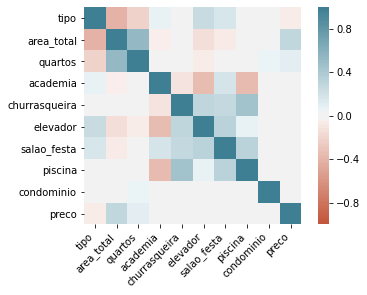

In [115]:
# Cria o heatmap contendo a correlação entre todos os atributos do conjunto de dados
corr = dfImoveis_SCS_final.corr(method = 'pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, # valor mínimo, máximo e o centro 
    cmap=sns.diverging_palette(20, 220, n=200), # paleta de cores
    square=True # forma de um quadrado
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);
# Salva a Figura do Heatmap
plt.savefig("imagens/heatmapImoveis.png", bbox_inches="tight")

Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [116]:
# Verificando o skew de cada atributo
# Apresenta a kurtosis de todos os atributos
dfImoveis_SCS_final.skew()

tipo            -5.336028
area_total       7.075620
quartos          0.810806
academia         0.937969
churrasqueira   -0.753567
elevador        -1.625552
salao_festa     -1.336426
piscina         -0.339374
condominio       0.220658
preco            2.858638
dtype: float64

Uma curtose negativa significa que sua distribuição é mais plana (achatada - espalhada) que uma curva normal com a mesma média e desvio padrão.

Uma curtose positiva significa que sua distribuição é mais "pontuda (concentrada)" que uma curva normal com a mesma média e desvio padrão.

In [117]:
# Apresenta a kurtosis de todos os atributos
dfImoveis_SCS_final.kurtosis()

tipo              26.487012
area_total       104.711368
quartos            0.891616
academia          -1.120799
churrasqueira     -1.432884
elevador           0.735564
salao_festa       -0.214078
piscina           -1.885810
condominio         0.706777
preco              7.935295
dtype: float64

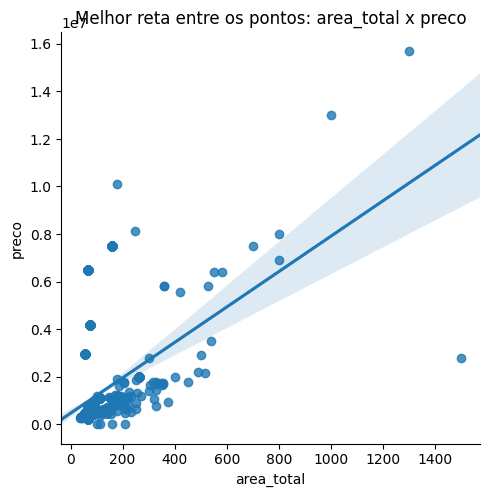

In [118]:
# Apresenta o gráfico de pontos entre dois atributos e a melhor linha entre eles
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='area_total', y='preco', data=dfImoveis_SCS_final)
plt.title("Melhor reta entre os pontos: area_total x preco");
# Salva a Figura
plt.savefig("imagens/scatterAreaTotalPreco.png", bbox_inches="tight")

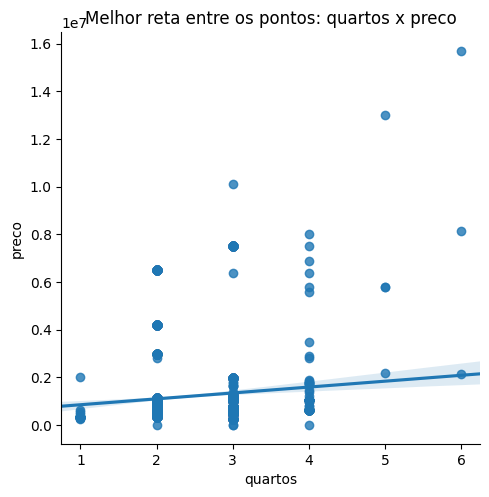

In [119]:
# Apresenta o gráfico de pontos entre dois atributos e a melhor linha entre eles
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='quartos', y='preco', data=dfImoveis_SCS_final)
plt.title("Melhor reta entre os pontos: quartos x preco");
# Salva a Figura
plt.savefig("imagens/scatterQuartosPreco.png", bbox_inches="tight")

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

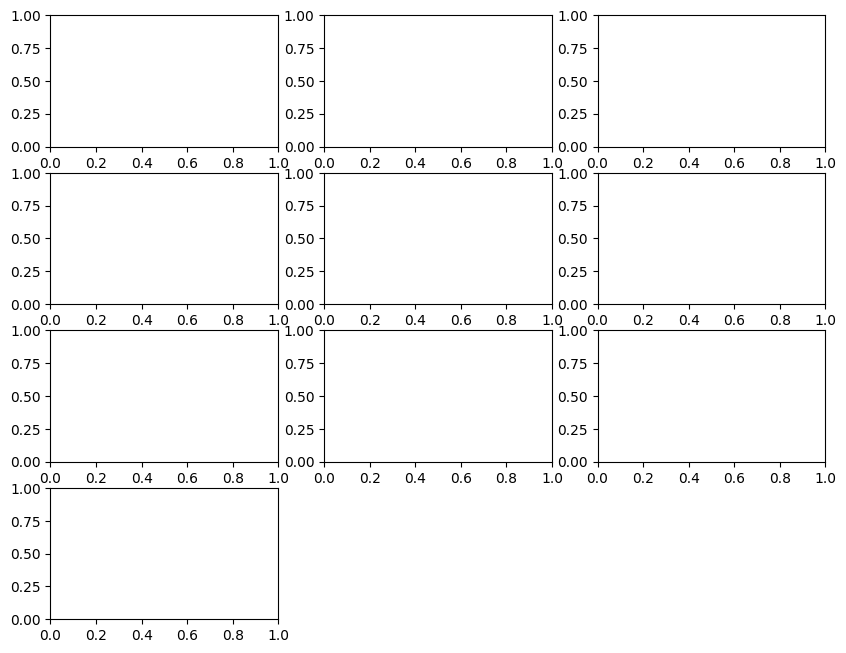

In [123]:
# Apresenta o histograma de todos os atributos
dfImoveis_SCS_final.hist().all()
# Salva a Figura
plt.savefig("imagens/histogramaImoveis.png", bbox_inches="tight")

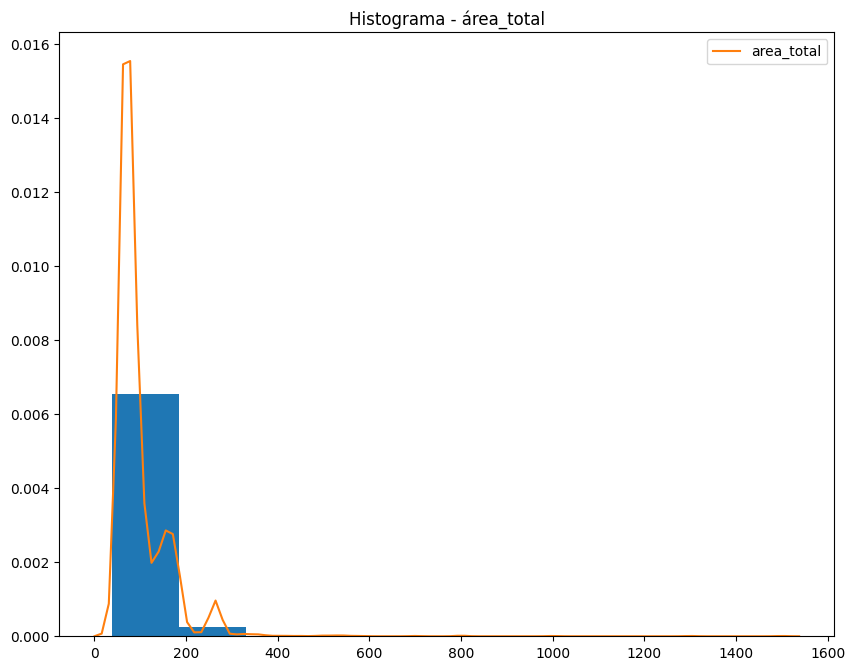

sk = 7.075619740208874, Ck = 104.71136774105047
Média=98.72632402817636, Mediana=79.0, Moda=0    68
dtype: int64


In [124]:
# plota o histograma com a melhor curva associada 
plt.figure()
plt.hist(dfImoveis_SCS_final['area_total'], histtype='barstacked',  density=True);
sns.kdeplot(dfImoveis_SCS_final['area_total']);
plt.title("Histograma - área_total")

# Salva a Figura
plt.savefig("imagens/histAreaTotal.png")

plt.show()

# apresenta o skewness e a kurtosis abaixo do gráfico
print("sk = {}, Ck = {}".format(dfImoveis_SCS_final['area_total'].skew(), dfImoveis_SCS_final['area_total'].kurtosis()))
print("Média={}, Mediana={}, Moda={}".format(dfImoveis_SCS_final['area_total'].mean(), dfImoveis_SCS_final['area_total'].median(), dfImoveis_SCS_final['area_total'].mode()))

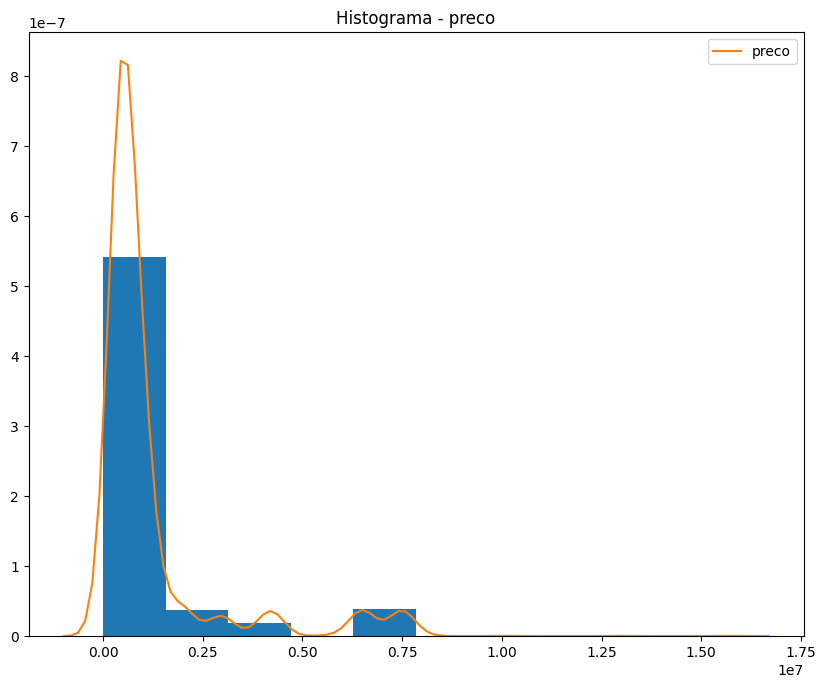

sk = 2.858637801308123, Ck = 7.935294896551547
Média=1205462.8964257762, Mediana=510000.0, Moda=0    450000
dtype: int64


In [125]:
# plota o histograma com a melhor curva associada 
plt.figure()
plt.hist(dfImoveis_SCS_final['preco'], histtype='barstacked',  density=True);
sns.kdeplot(dfImoveis_SCS_final['preco']);
plt.title("Histograma - preco")

# Salva a Figura
plt.savefig("imagens/histPreco.png")

plt.show()

# apresenta o skewness e a kurtosis abaixo do gráfico
print("sk = {}, Ck = {}".format(dfImoveis_SCS_final['preco'].skew(), dfImoveis_SCS_final['preco'].kurtosis()))
print("Média={}, Mediana={}, Moda={}".format(dfImoveis_SCS_final['preco'].mean(), dfImoveis_SCS_final['preco'].median(), dfImoveis_SCS_final['preco'].mode()))

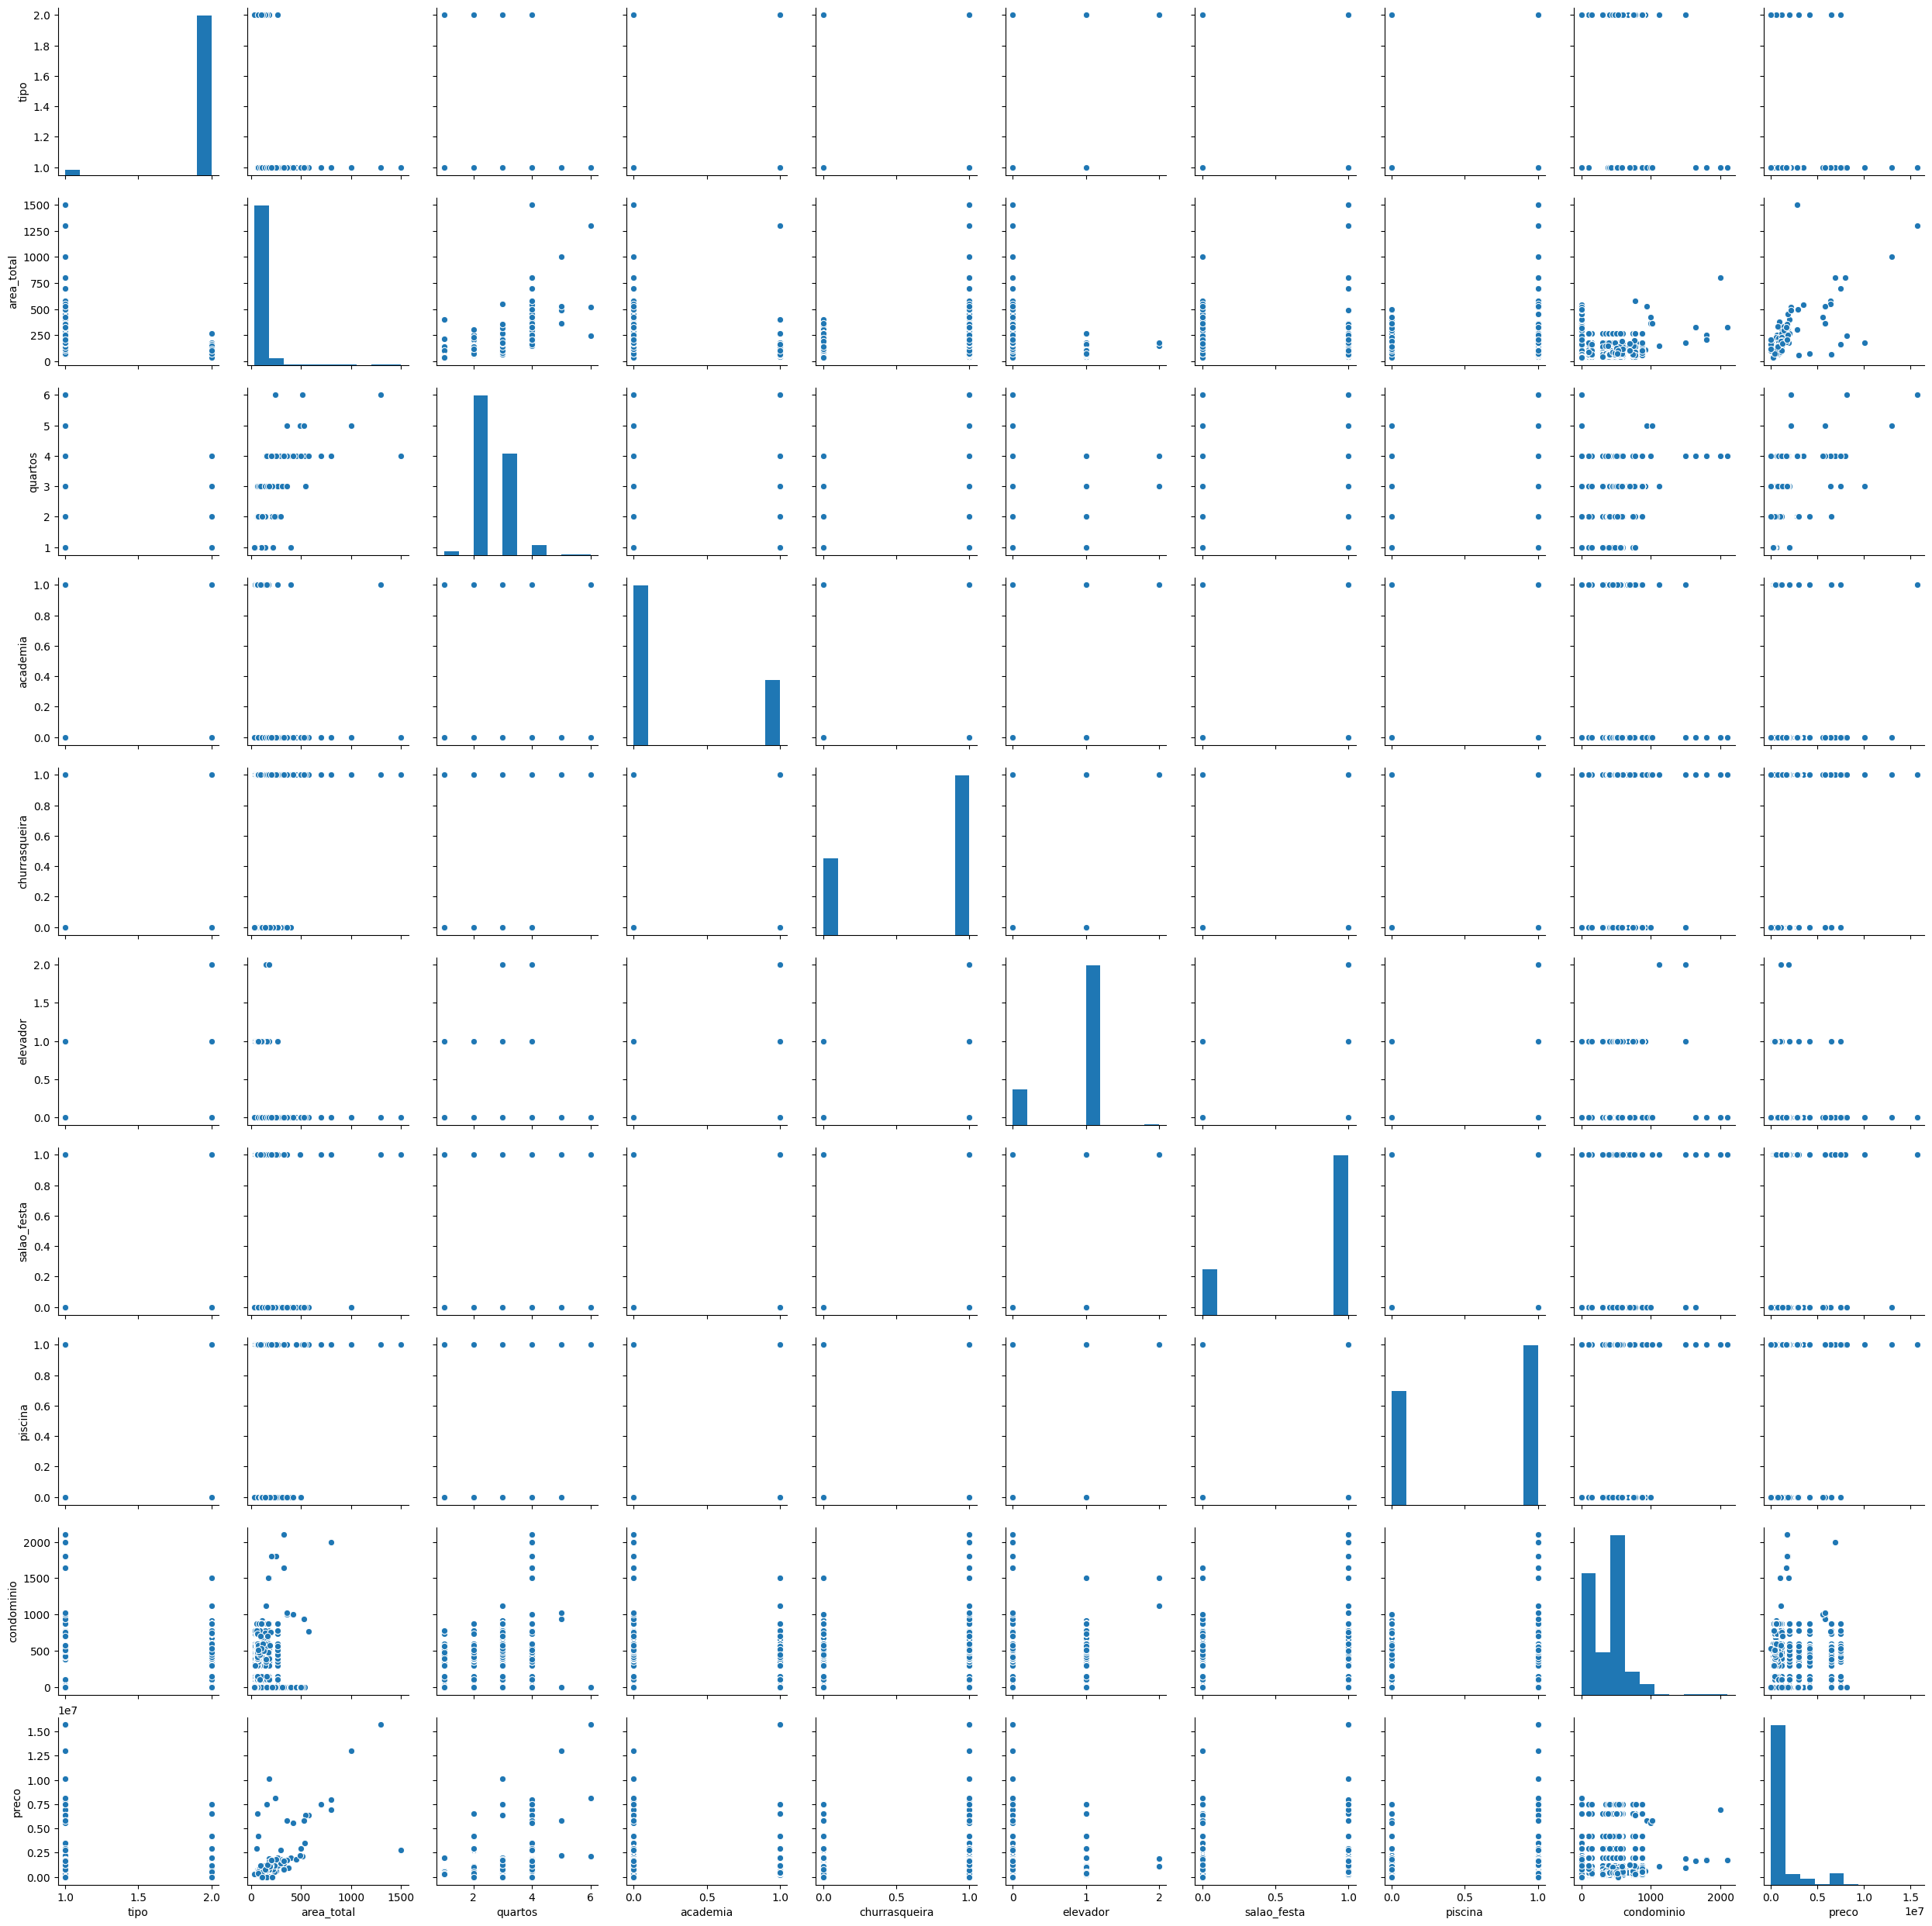

In [126]:
# Pairplot - scatter plot e histograma no mesmo gráfico
sns.pairplot(dfImoveis_SCS_final)

# Salva a Figura
plt.savefig("imagens/histScatterImoveis.png", bbox_inches="tight")

  Rótulo   mediana  quartil_hum  quartil_tres  valor_alto  valor_baixo
0  preco  510000.0     450000.0      990000.0   1800000.0        540.0


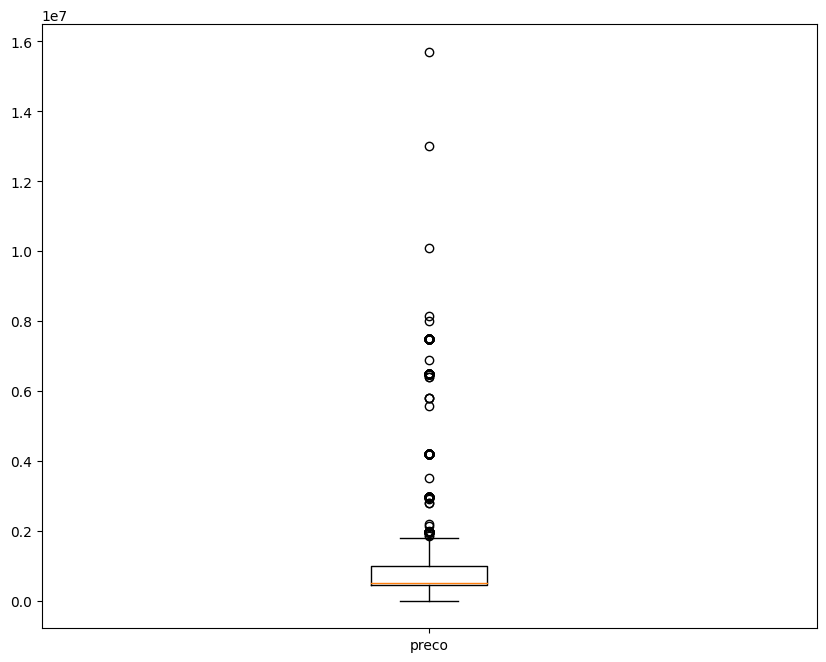

In [130]:
# Gráfico do boxplot com uma função que obtém os valores associados para preco
def get_box_plot_data(labels, bp):
    lista = []

    for i in range(len(labels)): # range(4) = 0, 1, 2, 3
        dict1 = {}
        dict1['Rótulo'] = labels[i]
        dict1['valor_baixo'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['quartil_hum'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana'] = bp['medians'][i].get_ydata()[1]
        dict1['quartil_tres'] = bp['boxes'][i].get_ydata()[2]
        dict1['valor_alto'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        lista.append(dict1)

    return pd.DataFrame(lista)

dados_plot = [dfImoveis_SCS_final['preco']]

labels = ['preco']

bp = plt.boxplot(dados_plot, labels=labels)
print(get_box_plot_data(labels, bp))

# Salva a Figura
plt.savefig("imagens/boxPlotPreco.png")

plt.show()

       Rótulo  mediana  quartil_hum  quartil_tres  valor_alto  valor_baixo
0  area_total     79.0         65.0         106.0       160.0         38.0


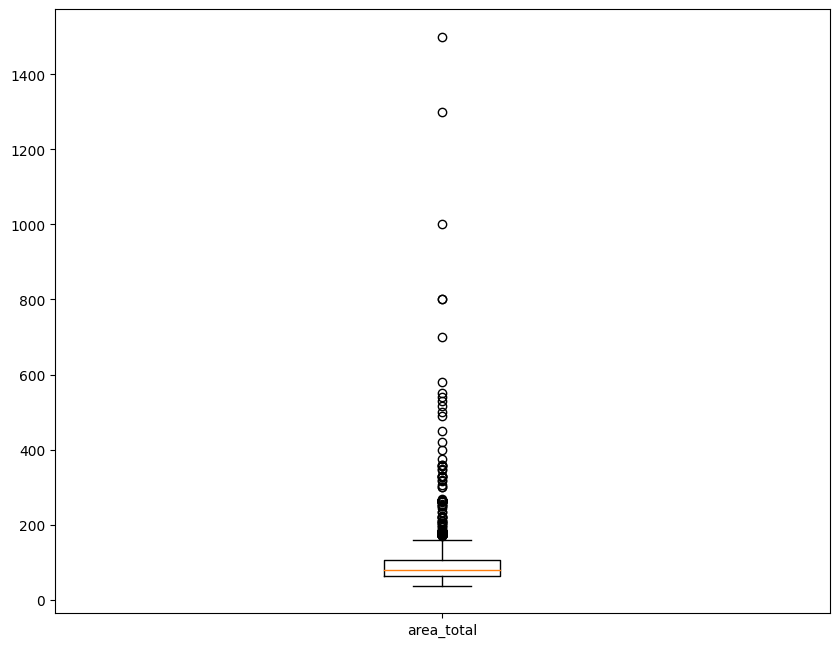

In [128]:
# Gráfico do boxplot com uma função que obtém os valores associados para area_total
def get_box_plot_data(labels, bp):
    lista = []

    for i in range(len(labels)): # range(4) = 0, 1, 2, 3
        dict1 = {}
        dict1['Rótulo'] = labels[i]
        dict1['valor_baixo'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['quartil_hum'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana'] = bp['medians'][i].get_ydata()[1]
        dict1['quartil_tres'] = bp['boxes'][i].get_ydata()[2]
        dict1['valor_alto'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        lista.append(dict1)

    return pd.DataFrame(lista)

dados_plot = [dfImoveis_SCS_final['area_total']]

labels = ['area_total']

bp = plt.boxplot(dados_plot, labels=labels)
print(get_box_plot_data(labels, bp))

# Salva a Figura
plt.savefig("imagens/boxPlotAreaTotal.png")

plt.show()

    Rótulo  mediana  quartil_hum  quartil_tres  valor_alto  valor_baixo
0  quartos      2.0          2.0           3.0         4.0          1.0


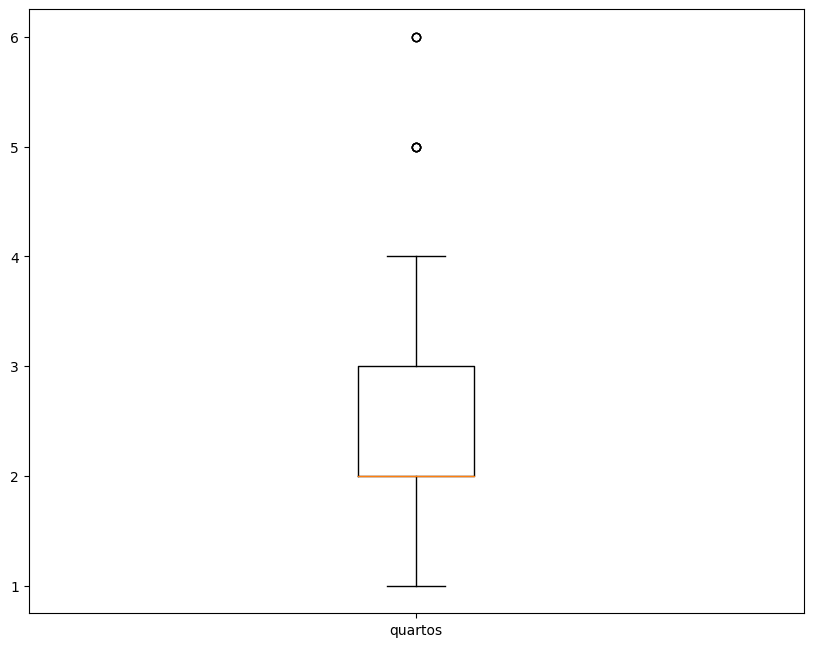

In [129]:
# Gráfico do boxplot com uma função que obtém os valores associados para quartos
def get_box_plot_data(labels, bp):
    lista = []

    for i in range(len(labels)): # range(4) = 0, 1, 2, 3
        dict1 = {}
        dict1['Rótulo'] = labels[i]
        dict1['valor_baixo'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['quartil_hum'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana'] = bp['medians'][i].get_ydata()[1]
        dict1['quartil_tres'] = bp['boxes'][i].get_ydata()[2]
        dict1['valor_alto'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        lista.append(dict1)

    return pd.DataFrame(lista)

dados_plot = [dfImoveis_SCS_final['quartos']]

labels = ['quartos']

bp = plt.boxplot(dados_plot, labels=labels)
print(get_box_plot_data(labels, bp))

# Salva a Figura
plt.savefig("imagens/boxPlotQuartos.png")

plt.show()

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font>